<H3>Notebook procesamiento de imágenes</H3>
<b>Diana Jaramillo</b>

Este Notebook tiene como objetivo explorar algunas funciones de las librerias que ofrece python para el procesamiento de imagenes, las librerias usadas fueron:


Importacion de las librerias

In [35]:
import PIL.Image as PIL
import cv2
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt


Cargar images de prueba

Usando Pillow

In [7]:
img_planta=PIL.open("Planta.jpg")
img_chento=PIL.open("Chento.jpg")
img_planta.show()
img_chento.show()

Manipulacion simple de tamaño y recorte

In [8]:
img_planta.crop((100,100,400,400)).show()
img_chento.crop((100,100,400,400)).show()
img_planta_resized=img_planta.resize((200,200))
img_chento_resized=img_chento.resize((200,200))
img_planta_resized.show()
img_chento_resized.show()

In [9]:
img1colores=img_planta.getbands()
img2colores=img_chento.getbands()
print(img1colores)
print(img2colores)


('R', 'G', 'B')
('R', 'G', 'B')


Cambiando las bandas de color

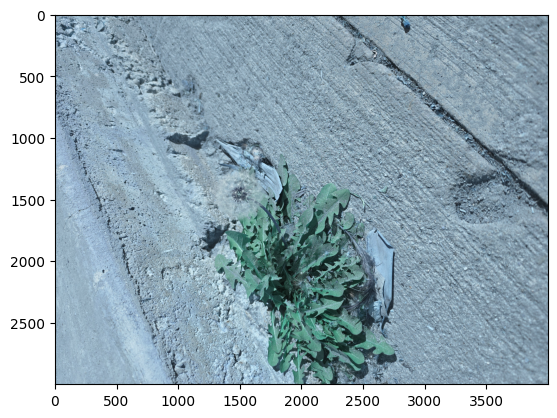

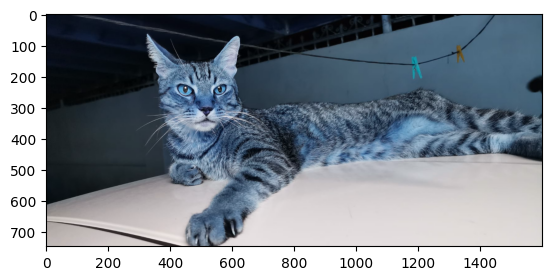

In [25]:
planta_r,img_planta_g,img_planta_b=img_planta.split()
chento_r,img_chento_g,img_chento_b=img_chento.split()
img_planta_merged=PIL.merge("RGB",(img_planta_b,img_planta_g,planta_r))
img_chento_merged=PIL.merge("RGB",(img_chento_b,img_chento_g,chento_r))
plt.imshow(img_planta_merged)
plt.show()
plt.imshow(img_chento_merged)
plt.show()

Usando skimage

Imagenes con ruido

In [10]:
noise_img1=sk.util.random_noise(np.array(img_planta),mode='s&p',amount=0.2)
noise_img2=sk.util.random_noise(np.array(img_chento),mode='s&p',amount=0.2)
PIL.fromarray((noise_img1*255).astype(np.uint8)).show()
PIL.fromarray((noise_img2*255).astype(np.uint8)).show()

Aplicando filtro de mediana para eliminar ruido

In [11]:
filtered_img1=sk.filters.median(noise_img1)
filtered_img2=sk.filters.median(noise_img2)
PIL.fromarray((filtered_img1*255).astype(np.uint8)).show()
PIL.fromarray((filtered_img2*255).astype(np.uint8)).show()

Invertir los colores de la imagen

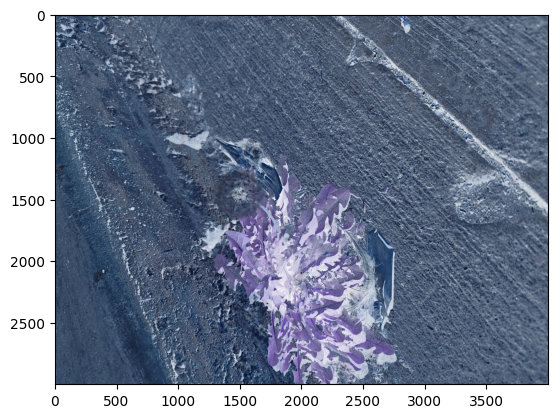

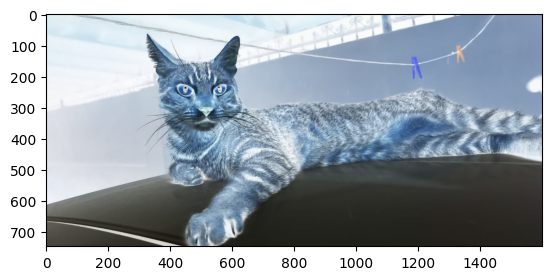

In [14]:
inverted_img1=sk.util.invert(np.array(img_planta))
inverted_img2=sk.util.invert(np.array(img_chento))
plt.imshow(inverted_img1,cmap='gray')
plt.show()
plt.imshow(inverted_img2,cmap='gray')
plt.show()

Manipulacion de contraste

c:\Users\Pocho\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\_shared\utils.py:587: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


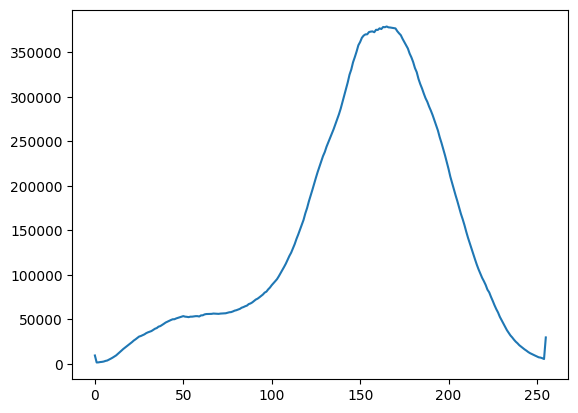

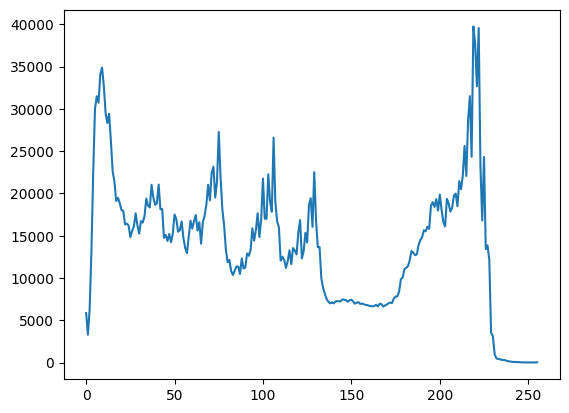

In [ ]:
c_planta=sk.exposure.histogram(np.array(img_planta))
c_chento=sk.exposure.histogram(np.array(img_chento))
plt.plot(c_planta[1],c_planta[0])
plt.show()
plt.plot(c_chento[1],c_chento[0])
plt.show()

El histograma regresa el numero de pixeles que corresponde a cada valor de bin (banda)

Histograma de Ecualización de contraste, ejemplo en el tutorial de scikit-image

In [27]:
from skimage import img_as_float, exposure
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram."""
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

c:\Users\Pocho\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\_shared\utils.py:587: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


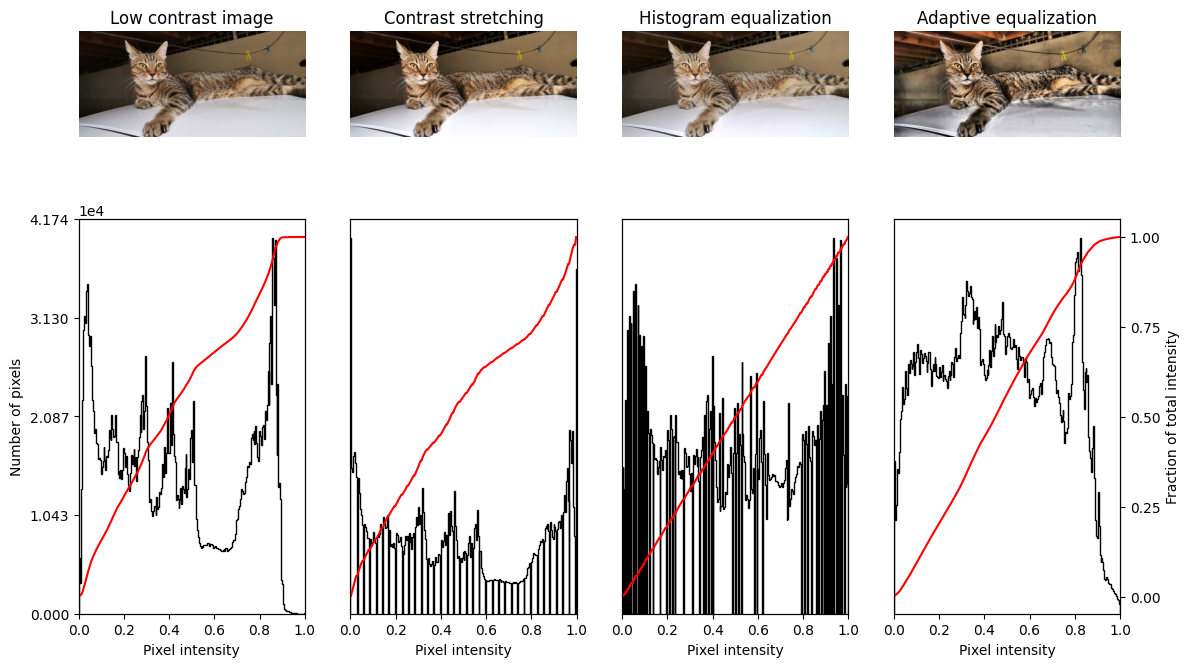

In [34]:
con2, con98 = np.percentile(np.array(img_chento), (2, 98))
img_chento_rescale = sk.exposure.rescale_intensity(np.array(img_chento), in_range=(con2, con98))
img_eq_chento = sk.exposure.equalize_hist(np.array(img_chento))
img_adapteq_chento = sk.exposure.equalize_adapthist(np.array(img_chento), clip_limit=0.03)

fig=plt.figure(figsize=(12, 8))
axes=np.zeros((2,4),dtype=object)
axes[0,0]=fig.add_subplot(2,4,1)
for i in range(1,4):
    axes[0,i]=fig.add_subplot(2,4,i+1,sharex=axes[0,0],sharey=axes[0,0])
for i in range(4):
    axes[1,i]=fig.add_subplot(2,4,i+5)
ax_img, axhist,ax_cdf= plot_img_and_hist(np.array(img_chento),axes[:,0])
ax_img.set_title('Low contrast image')
y_min, y_max = axhist.get_ylim()
axhist.set_ylabel('Number of pixels')
axhist.set_yticks(np.linspace(0, y_max, 5))
ax_img, axhist,ax_cdf= plot_img_and_hist(img_chento_rescale,axes[:,1])
ax_img.set_title('Contrast stretching')
ax_img, axhist,ax_cdf= plot_img_and_hist(img_eq_chento,axes[:,2])
ax_img.set_title('Histogram equalization')
ax_img, axhist,ax_cdf= plot_img_and_hist(img_adapteq_chento,axes[:,3])
ax_img.set_title('Adaptive equalization')
ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))
fig.tight_layout()
plt.show()

Usando CV2

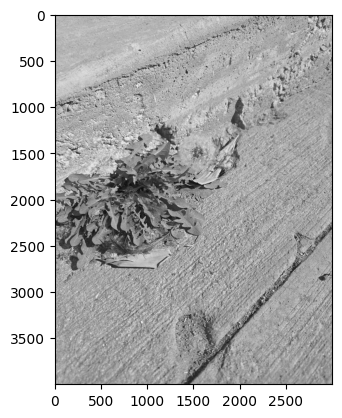

In [13]:
img =cv2.imread("Planta.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')
plt.show()


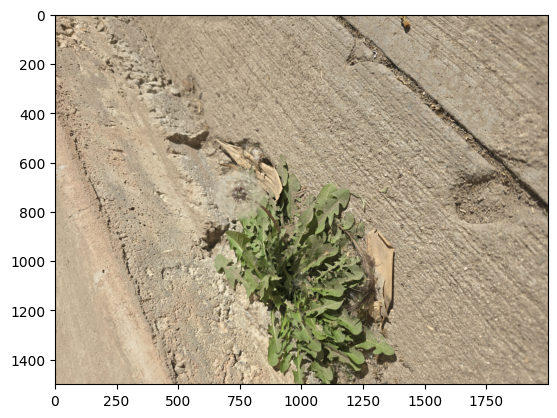

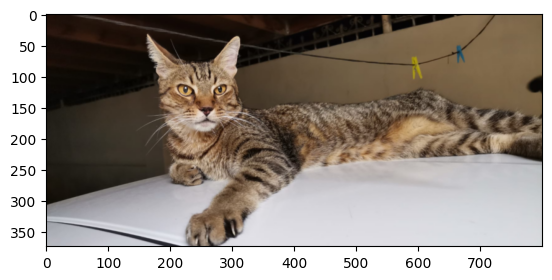

In [ ]:
low_res_img1=cv2.pyrDown(np.array(img_planta),dstsize=(img_planta.width//2, img_planta.height//2))
plt.imshow(low_res_img1)
plt.show()
low_res_img2=cv2.pyrDown(np.array(img_chento),dstsize=(img_chento.width//2, img_chento.height//2))
plt.imshow(low_res_img2)
plt.show()

Recortar imagenes usando mascara

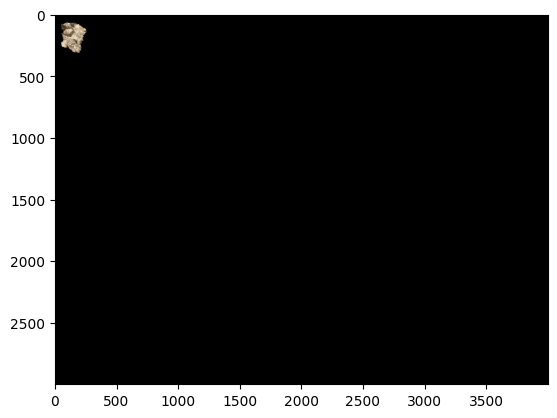

In [22]:
mask=np.zeros((img_planta.height,img_planta.width),dtype=np.uint8)
plantabg=np.zeros((img_planta.height,img_planta.width,3),dtype=np.uint8)
planta=np.zeros((img_planta.height,img_planta.width,3),dtype=np.uint8)
square=(50,50,300,300)
cv2.grabCut(np.array(img_planta),mask,square,None,None,5,cv2.GC_INIT_WITH_RECT)
mask2=np.where((mask==2)|(mask==0),0,1).astype('uint8')
newimg_planta=np.array(img_planta)*mask2[:,:,np.newaxis]
plt.imshow(newimg_planta)
plt.show()

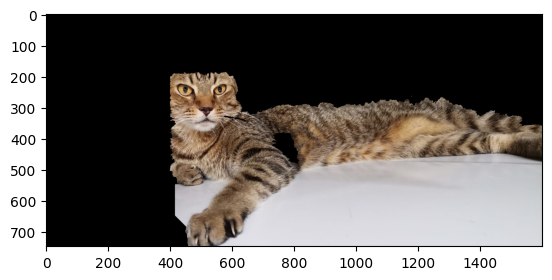

In [24]:
mask_chento=np.zeros((img_chento.height,img_chento.width),dtype=np.uint8)
chentobg=np.zeros((img_chento.height,img_chento.width,3),dtype=np.uint8)
chento=np.zeros((img_chento.height,img_chento.width,3),dtype=np.uint8)
square_chento=(img_chento.width//4,img_chento.height//4,img_chento.width*3//4,img_chento.height*3//4)
cv2.grabCut(np.array(img_chento),mask_chento,square_chento,None,None,5,cv2.GC_INIT_WITH_RECT)
mask2_chento=np.where((mask_chento==2)|(mask_chento==0),0,1).astype('uint8')
newimg_chento=np.array(img_chento)*mask2_chento[:,:,np.newaxis]
plt.imshow(newimg_chento)
plt.show()